# Stroke Prediction Data Analytics using Logistic regression and kNN classification.

### 1. Importing necessary libraries for the analysis

In [531]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore',category=UserWarning)

%matplotlib inline

### 2. Importing and loading the data from the csv containing dataset of every patient record

In [532]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.columns #features and traget value (stroke) in the dataset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### 2.1. Data Exploration

In [533]:
data.shape #size of the dataset

(5110, 12)

In [534]:
data.head() # first 5 row 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [535]:
data.tail() # last 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [536]:
data.info() # information of attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [537]:
data.describe() 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 3. Analysis of Data and Data Preprocessing

In [538]:
df = data.copy() #create a copy of the data for preprocessing
#id column contains unique values of all patients. So this column is dropped
df = df.drop(['id'],axis=1)

#### 3.1. Find the null values in the columns and process it

In [539]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [540]:
# bmi column has 201 null values
#fill the missing value in numerical variable with the mean value
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [541]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 3.2. Dividing the columns into numerical and categorical 

In [542]:
num = ['age','avg_glucose_level','bmi']
df_num = df[num]
cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
df_cat = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]

#### 3.3. Distribution of all numerical value (df_num)

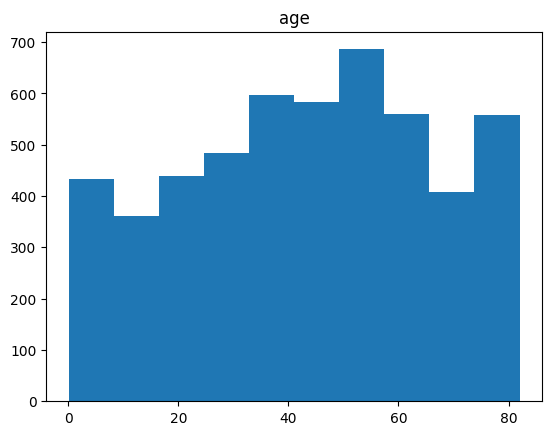

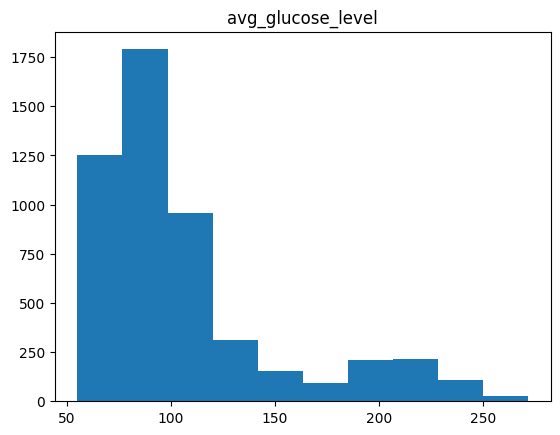

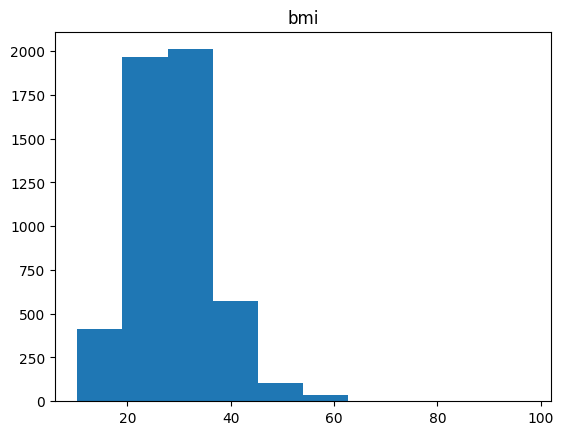

In [543]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

#### 3.4. Relation between Numerical valued feature and target variable (Stroke)

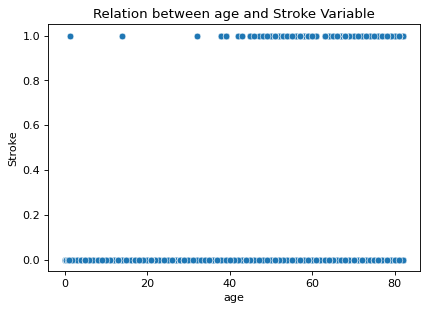

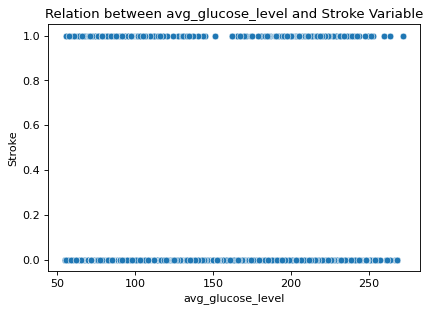

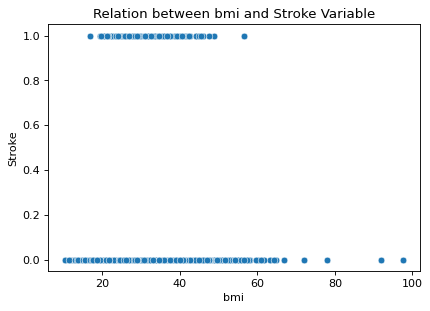

In [544]:
for i, num_feature in enumerate(num):
    plt.figure(i,figsize=(6, 4), dpi=80)
    sns.scatterplot(x=num_feature, y='stroke', data=df)
    plt.title('Relation between {} and Stroke Variable'.format(num_feature))
    plt.xlabel(num_feature)
    plt.ylabel('Stroke')
    plt.show()

In [545]:
#compare the stroke across, numerical values columns
pd.pivot_table(df,index = 'stroke', values=['age','avg_glucose_level','bmi'])

,age,avg_glucose_level,bmi
stroke,,,
0,41.971545,104.795513,28.825388
1,67.728193,132.544739,30.217789


#### 3.5. Check correlations between numerical values

                        age  avg_glucose_level       bmi
age                1.000000           0.238171  0.325942
avg_glucose_level  0.238171           1.000000  0.168751
bmi                0.325942           0.168751  1.000000


<Axes: >

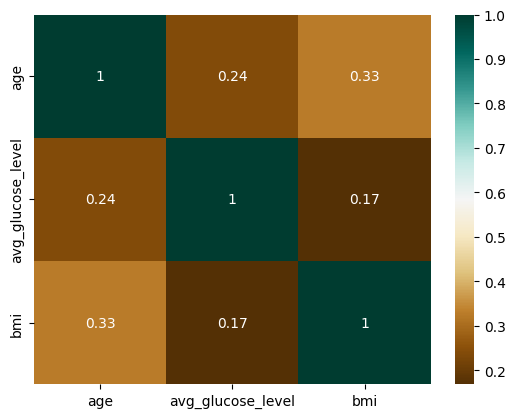

In [546]:
# to check correlations in numerical value
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True,cmap="BrBG")

#### 3.6. Distribution of all continuous variable in numerical data 

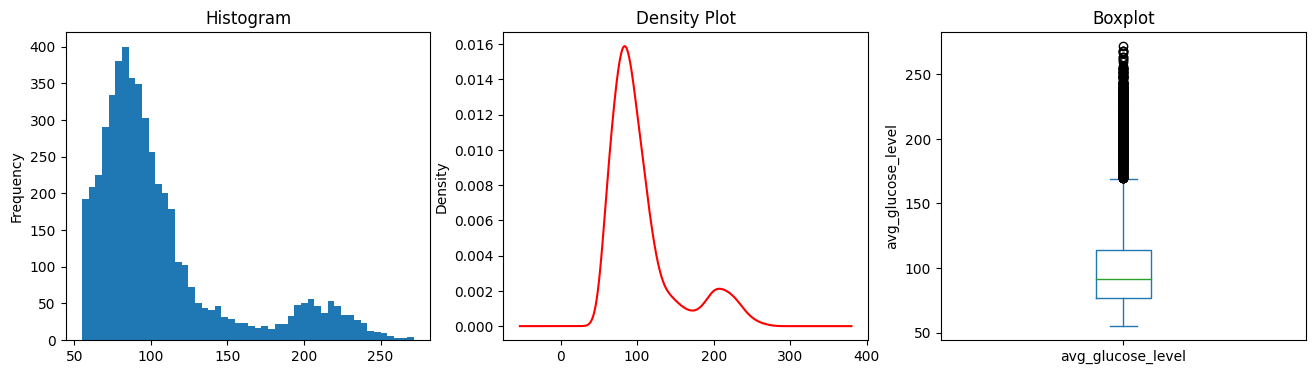

In [547]:
#distribution of continuous variable
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
df['avg_glucose_level'].plot(kind='hist',bins=50,ax=axes[0],xlabel="Avg glucose level",title="Histogram")
df['avg_glucose_level'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['avg_glucose_level'].plot(kind='box', ax=axes[2], ylabel='avg_glucose_level',
                           xlabel='', title='Boxplot')
plt.show()

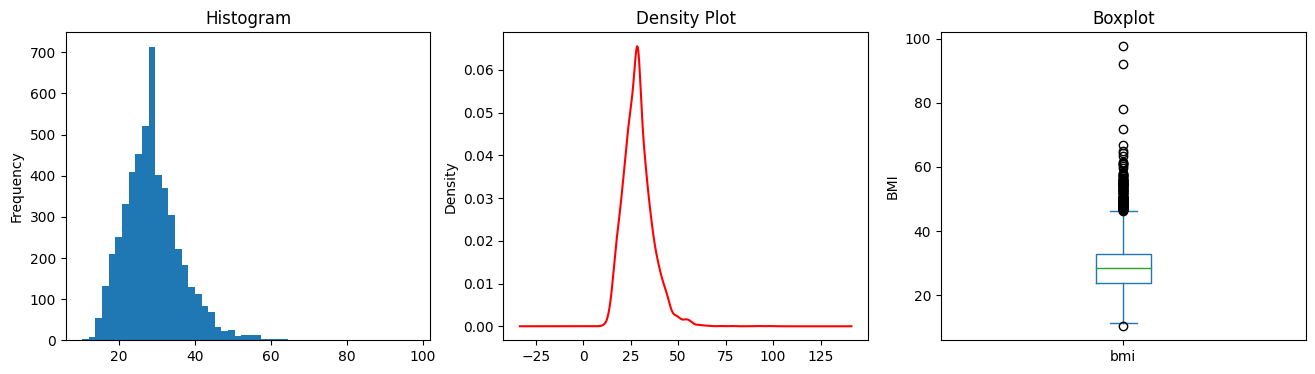

In [548]:
#distribution of continuous variable
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
df['bmi'].plot(kind='hist',bins=50,ax=axes[0],xlabel="BMI",title="Histogram")
df['bmi'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['bmi'].plot(kind='box', ax=axes[2], ylabel='BMI',
                           xlabel='', title='Boxplot')
plt.show()

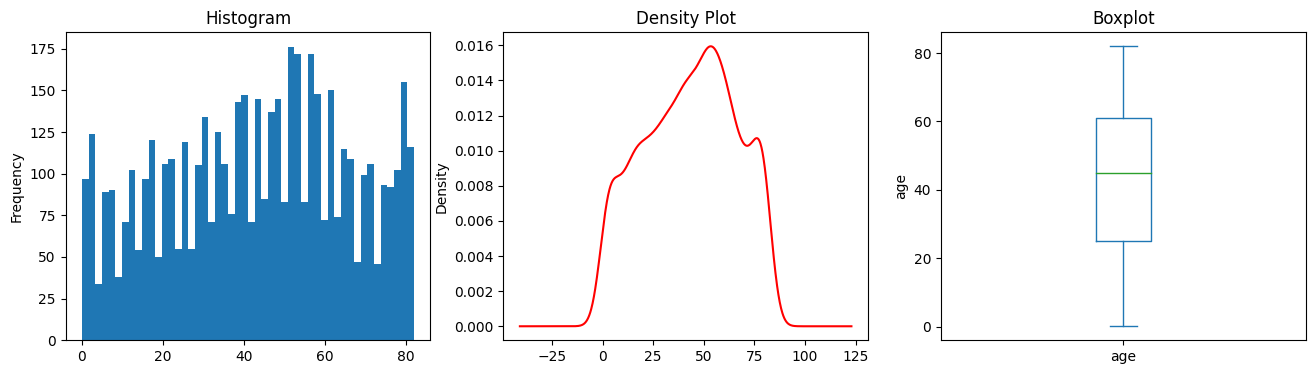

In [549]:
#distribution of continuous variable
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
df['age'].plot(kind='hist',bins=50,ax=axes[0],xlabel="age",title="Histogram")
df['age'].plot(kind='density', color='r', ax=axes[1], title='Density Plot')
df['age'].plot(kind='box', ax=axes[2], ylabel='age',
                           xlabel='', title='Boxplot')
plt.show()

#### 3.7 Distribution of all categorical values (df_cat)

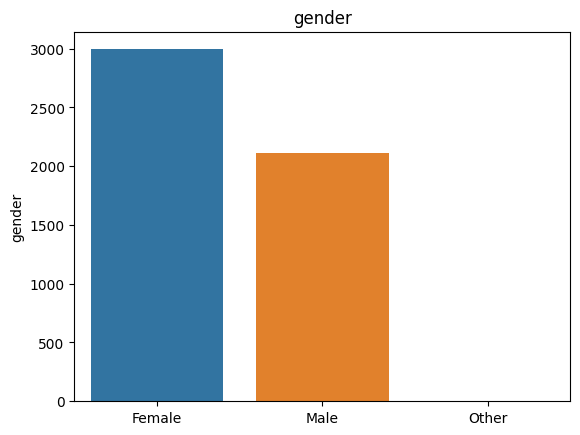

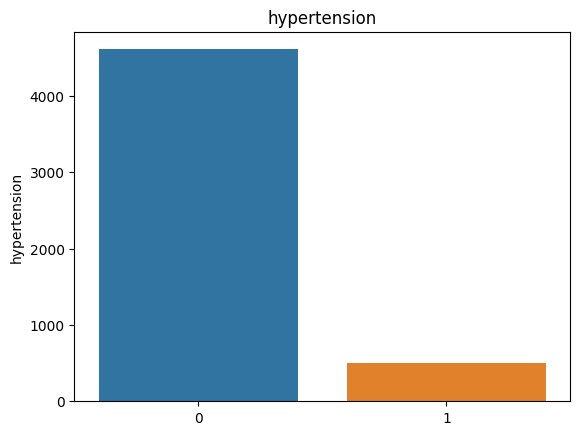

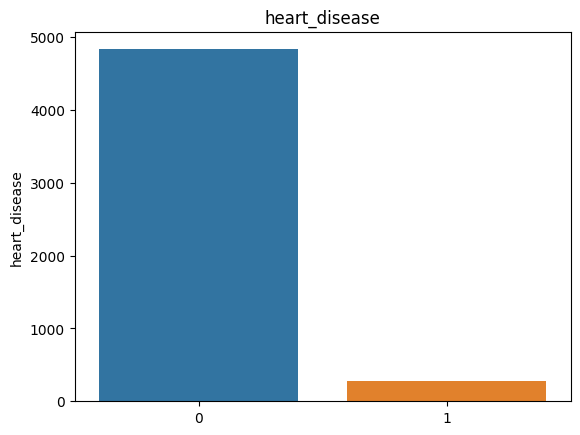

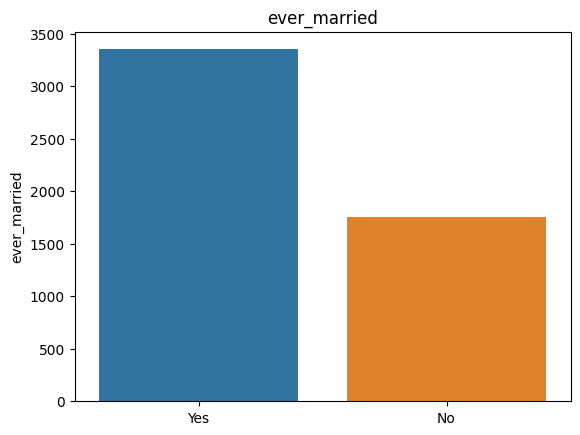

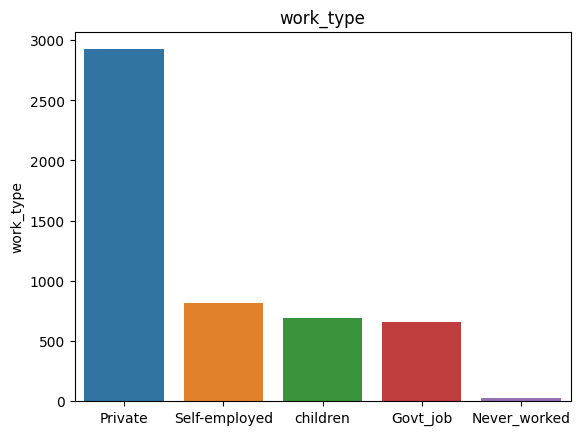

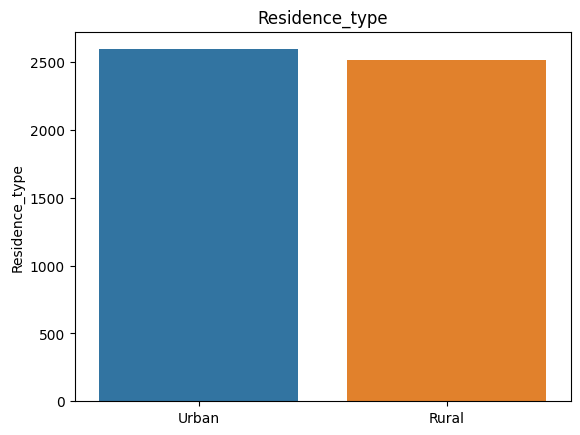

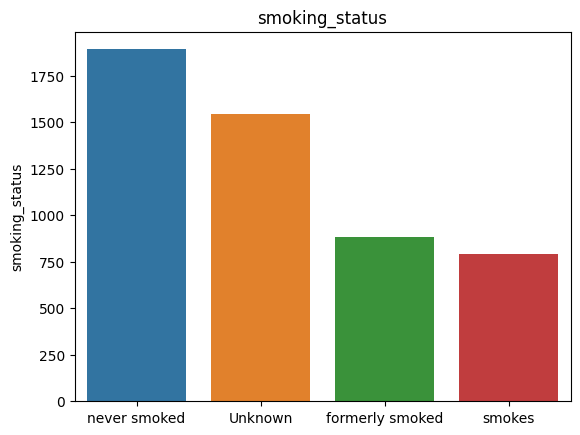

In [550]:
#distribution for all categorical values (df_cat)
# x gives 0 and 1 at x axis
# y gives count value 
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index ,y=df_cat[i].value_counts()).set_title(i)
    plt.show()

In [551]:
#remove 'Other' in gender column
print(df["gender"].value_counts())
df = df.drop(df[df["gender"]=="Other"].index.values,axis=0)
print(df["gender"].value_counts())
df.shape

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Female    2994
Male      2115
Name: gender, dtype: int64


(5109, 11)

#### 3.8. Relation between Categorical valued feature and target variable (Stroke)

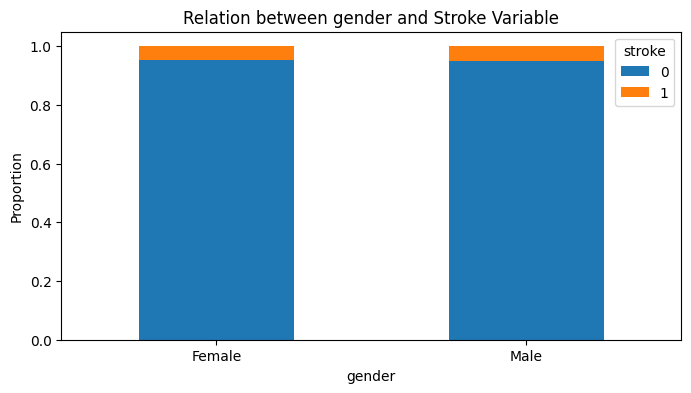

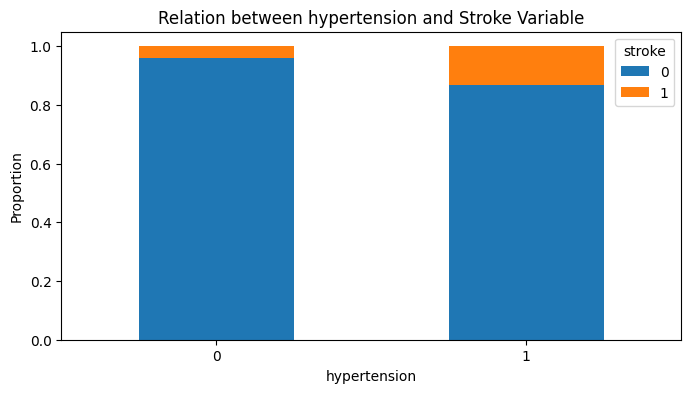

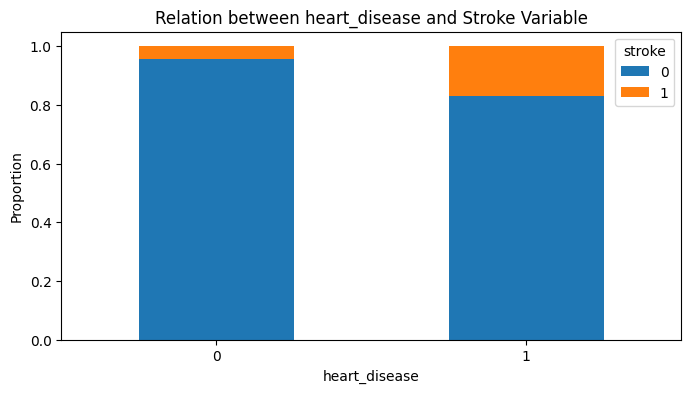

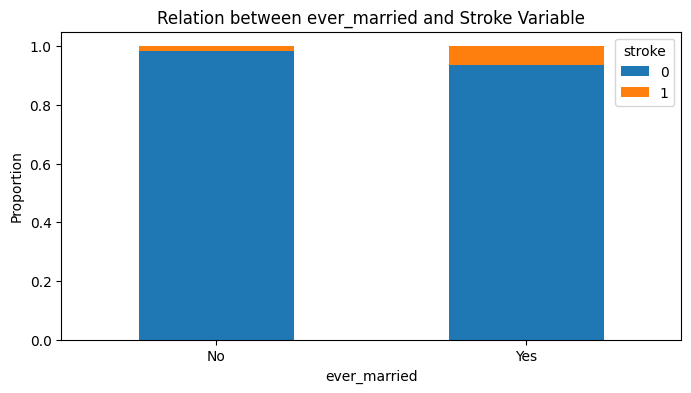

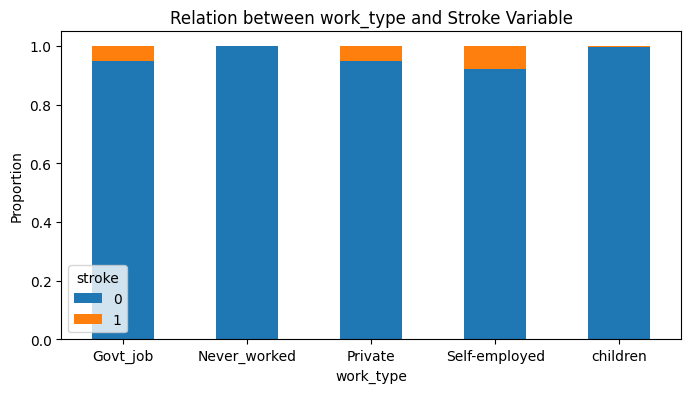

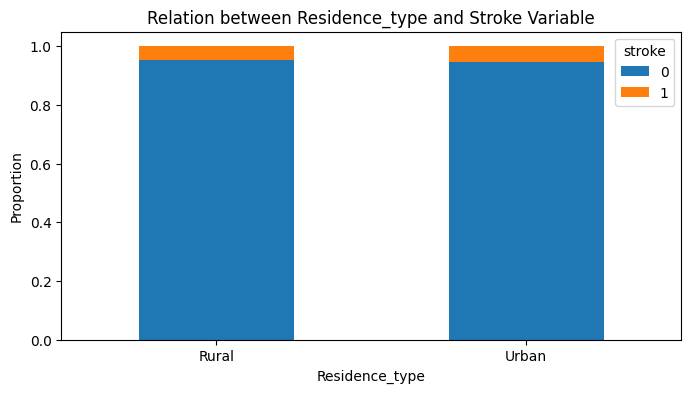

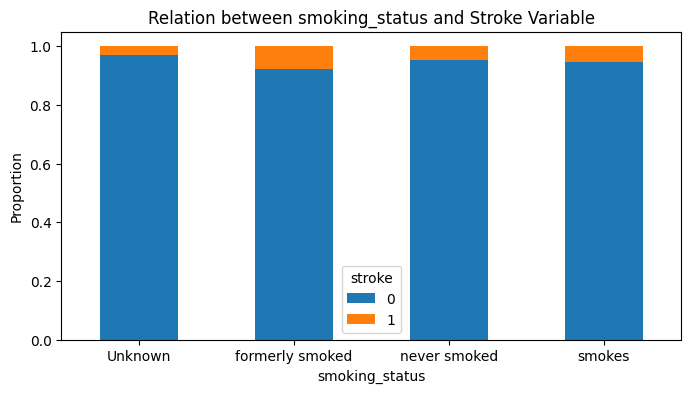

In [552]:
for feature in cat:
    ct = pd.crosstab(df[feature], df['stroke'], normalize='index')
    ct.plot(kind='bar', stacked=True,figsize=(8,4))
    plt.title(f'Relation between {feature} and Stroke Variable')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.show()

#### 3.9. Analysis on Traget Variable

In [553]:
print('Values and counts for stroke are: \n{}'.format(df['stroke'].value_counts()))
print('Values and normalised counts for stroke are: \n{}'.format(df['stroke'].value_counts(normalize=True)))

Values and counts for stroke are: 
0    4860
1     249
Name: stroke, dtype: int64
Values and normalised counts for stroke are: 
0    0.951262
1    0.048738
Name: stroke, dtype: float64


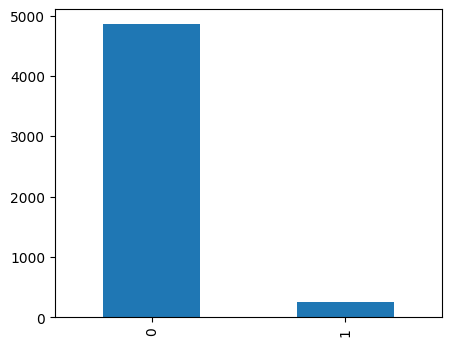

In [554]:
df['stroke'].value_counts().plot.bar(figsize=(5,4))
plt.show()

In [555]:
df_original = df.copy()

#### 3.10. Normalizing the numerical value for better modelling 

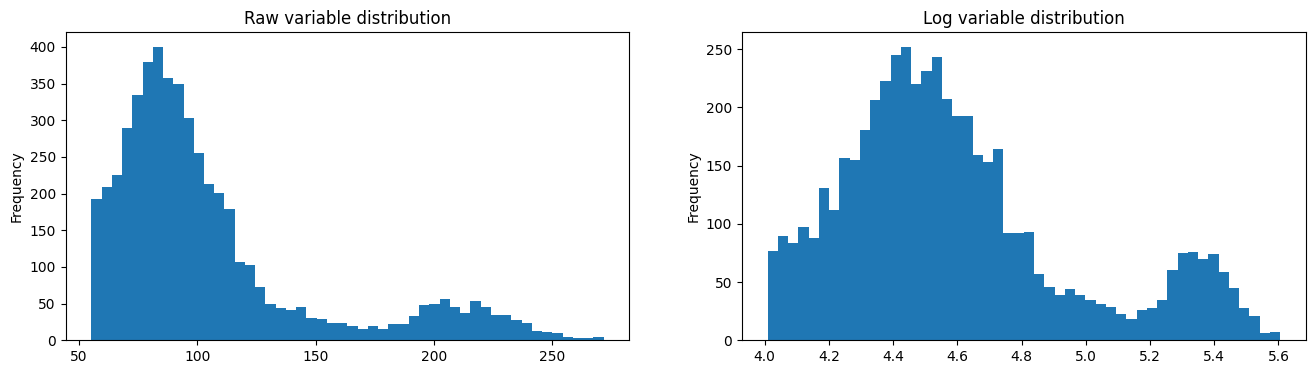

In [556]:
#adjusting distribution of continuous variables by normalization
df['avg_glucose_level_log']=np.log(df['avg_glucose_level'])
df['bmi_log']=np.log(df['bmi'])

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
df['avg_glucose_level'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['avg_glucose_level_log'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

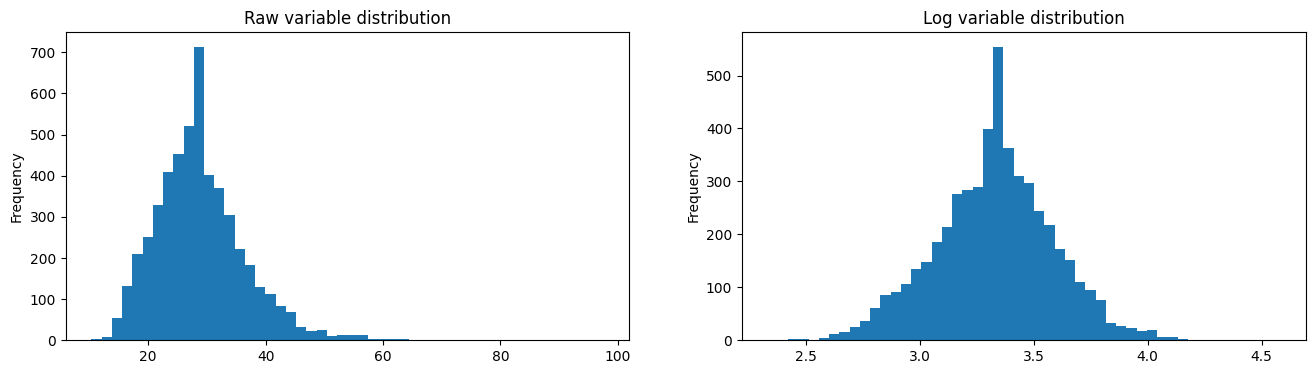

In [557]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
df['bmi'].plot(kind='hist', bins=50, ax=axes[0], title='Raw variable distribution')
df['bmi_log'].plot(kind='hist', bins=50, ax=axes[1], title='Log variable distribution')
plt.show()

#### 3.11. Coverting the categorical variables into integer ones using LabelEncoder

In [558]:
#converting categorical variables to integer ones. Label Encoder is used in this process
from sklearn.preprocessing import LabelEncoder
labelEncode = LabelEncoder() 
df['gender'] = labelEncode.fit_transform(df['gender'])
print('\nGender is converted to integer:\n{}'.format(df['gender'].value_counts()))
df['ever_married'] = labelEncode.fit_transform(df['ever_married'])
print('\nMarriage Status is converted to integer:\n{}'.format(df['ever_married'].value_counts()))
df['work_type'] = labelEncode.fit_transform(df['work_type'])
print('\nwork_type is converted to integer:\n{}'.format(df['work_type'].value_counts()))
df['Residence_type'] = labelEncode.fit_transform(df['Residence_type'])
print('\nResidence_type is converted to integer:\n{}'.format(df['Residence_type'].value_counts()))
df['smoking_status'] = labelEncode.fit_transform(df['smoking_status'])
print('\nsmoking_status is converted to integer:\n{}'.format(df['smoking_status'].value_counts()))


Gender is converted to integer:
0    2994
1    2115
Name: gender, dtype: int64

Marriage Status is converted to integer:
1    3353
0    1756
Name: ever_married, dtype: int64

work_type is converted to integer:
2    2924
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

Residence_type is converted to integer:
1    2596
0    2513
Name: Residence_type, dtype: int64

smoking_status is converted to integer:
2    1892
0    1544
1     884
3     789
Name: smoking_status, dtype: int64


### 4. Feature Selection

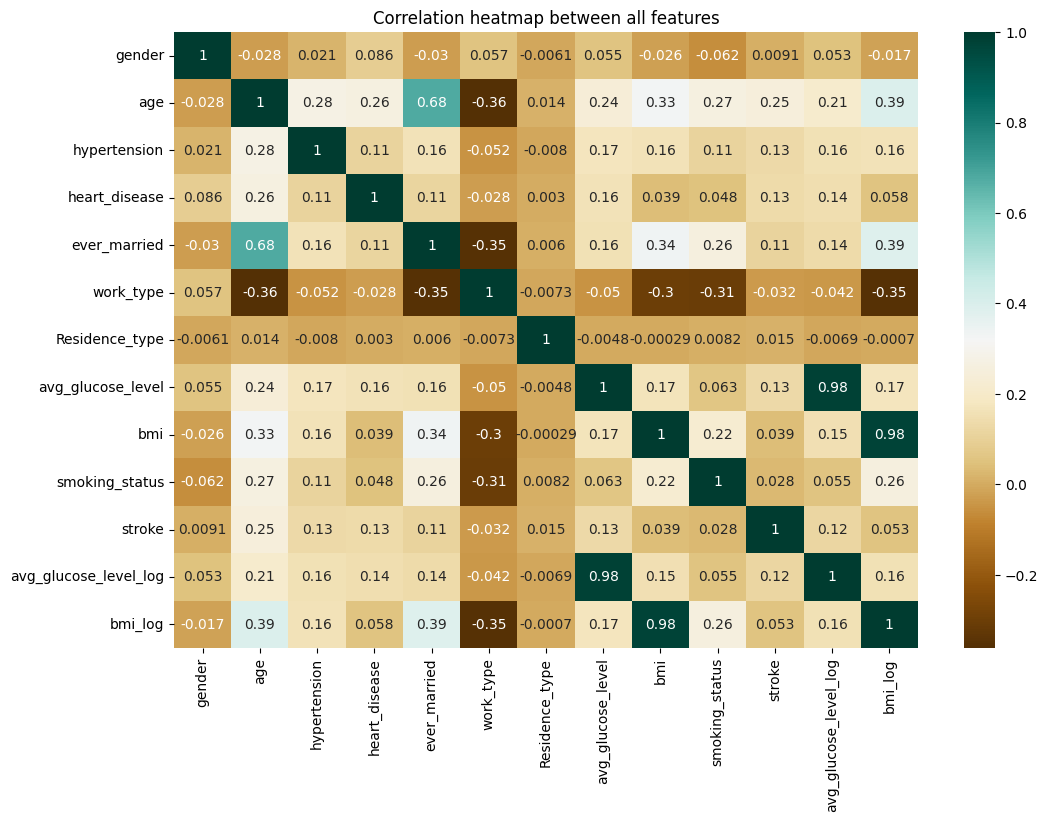

In [559]:
#generates correlation heatmap between all features
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="BrBG")
plt.title("Correlation heatmap between all features")
plt.show()

In [560]:
#drop bmi and avg glucose level because of high correlation coefficient
cols = ['avg_glucose_level','bmi']
df = df.drop(columns=cols,axis=1)

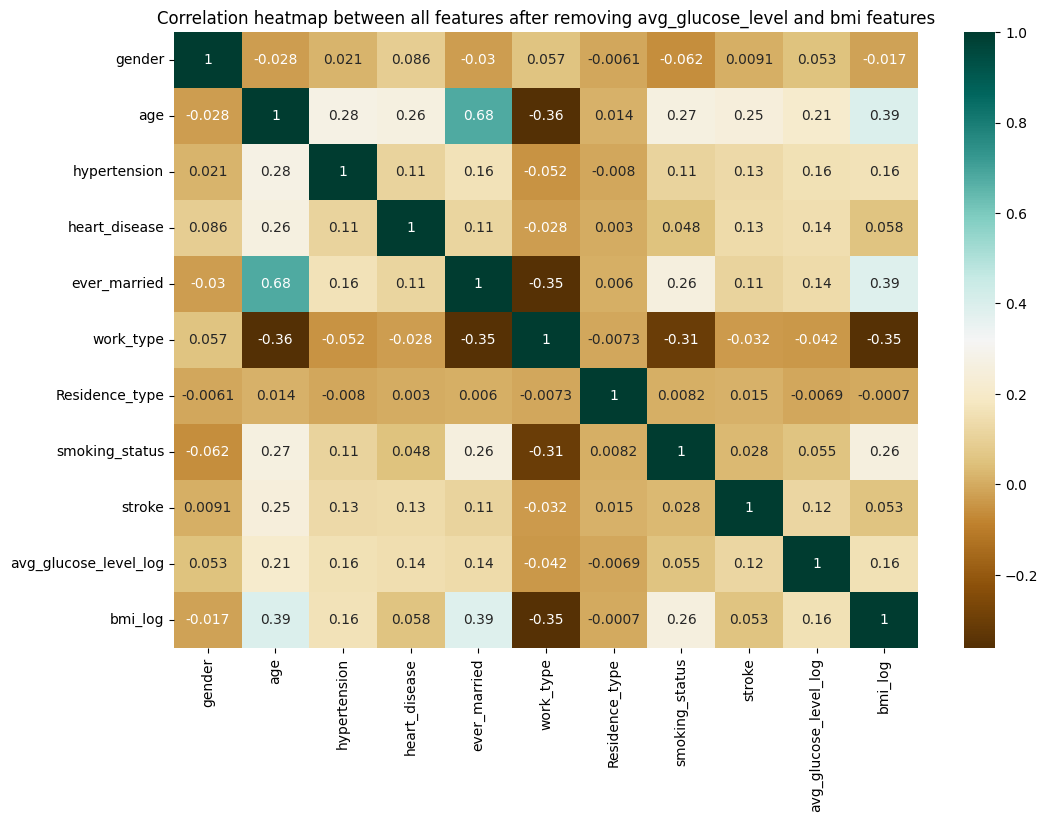

In [561]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="BrBG")
plt.title("Correlation heatmap between all features after removing avg_glucose_level and bmi features")
plt.show()

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  smoking_status  avg_glucose_level_log   bmi_log  
0              

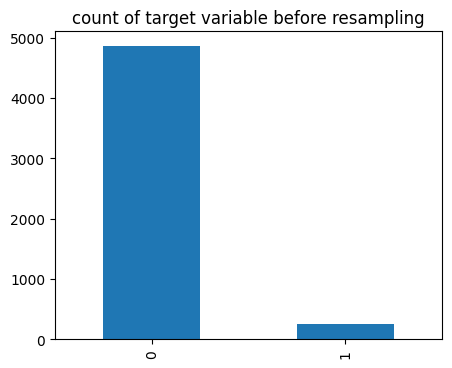

In [562]:
# Preparation of feature variable and target variable
X = df.drop(['stroke'],axis=1)
print(X)
y = df['stroke']
print('\nShape of X and y before resampling - X: {},y :{}\n'.format(X.shape,y.shape))
y.value_counts().plot.bar(figsize=(5,4))
plt.title('count of target variable before resampling')
plt.show()

In [563]:
#now check how strongly the remaining features are associated with target 
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X,y)
chi2_sorted = pd.Series(data=chi2.scores_, index=X.columns).sort_values()
ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()
mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()

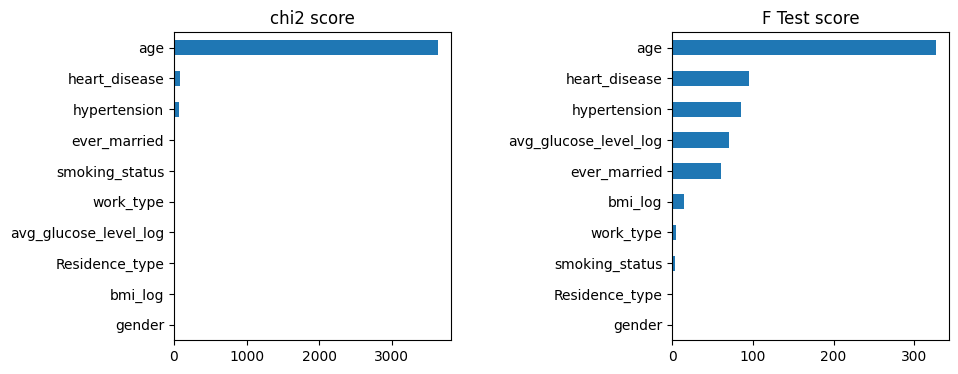

In [564]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.8)
chi2_sorted.plot(kind='barh', ax=axes[0], title='chi2 score')
ftest_sorted.plot(kind='barh', ax=axes[1], title='F Test score')
plt.show()

### 5. Prediction using Scikit-Learn

In [565]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, auc, roc_curve, classification_report

#### 5.1 Resampling the imbalance dataset with SMOTE technique


Shape of X and y after resampling - X: (9720, 10),y :(9720,)



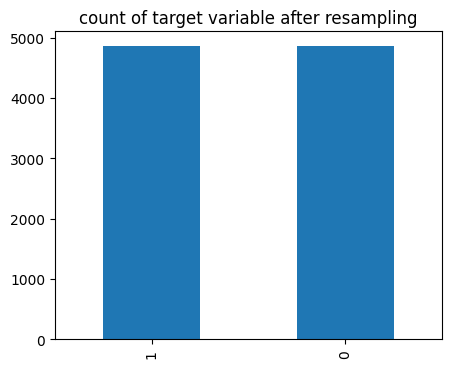

In [566]:
from imblearn.over_sampling import SMOTE #imblearn is derived from sklearn library
# Create SMOTE object
smote = SMOTE(random_state=42)
# resampling the imbalanced dataset
X, y = smote.fit_resample(X, y)
print('\nShape of X and y after resampling - X: {},y :{}\n'.format(X.shape,y.shape))
y.value_counts().plot.bar(figsize=(5,4))
plt.title('count of target variable after resampling')
plt.show()

#### 5.2. Prediction model with 10 fold cross validation function creation

In [567]:
def train_and_validate(model,X,y):
    print('\nResults from {} algorithm:'.format(model))
    #splitting the dataset into train and test data
    X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    #prediction
    predicted_model = model.fit(X_train,y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train,y_train)))
    #checking the cross validation score for 10 folds
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'.format(np.mean(scores),np.std(scores)))
    y_pred=model.predict(X_test)
    print('Accuracy on test data is {:.3f}\n'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
    print(classification_report(y_test,y_pred))
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    confusionmatrix = confusion_matrix(y_true=y_test, y_pred = y_pred)
    plt.figure(figsize=(4,4))
    print(confusionmatrix)
    ax = sns.heatmap(confusionmatrix,annot=True,fmt="d",cmap="BrBG",xticklabels=['N','Y'], cbar=False,yticklabels=['N','Y'],square=True,linewidths=8.0)
    ax.set_xlabel('Predicted Stroke')
    ax.set_ylabel('Actual Stroke')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)  
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return predicted_model

#### 5.3 Logistic Regression Model


Results from LogisticRegression() algorithm:

Accuracy on training data is 0.780

Mean cross-validation accuracy is 0.777 with SD 0.015
Accuracy on test data is 0.778

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       976
           1       0.76      0.81      0.78       968

    accuracy                           0.78      1944
   macro avg       0.78      0.78      0.78      1944
weighted avg       0.78      0.78      0.78      1944

Test data metrics: accuracy=0.778, f1=0.783, precision=0.762, recall=0.806
[[732 244]
 [188 780]]


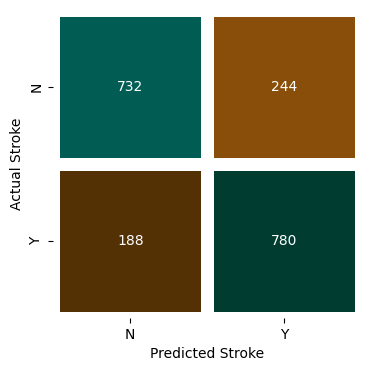

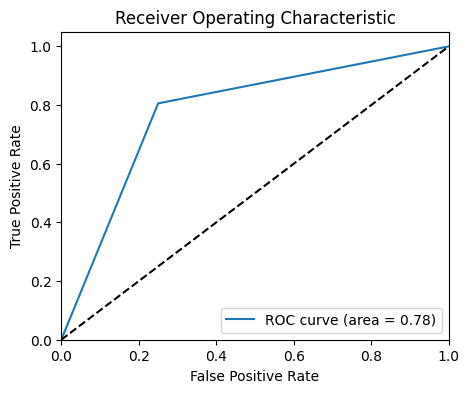

LogisticRegression()

In [568]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
train_and_validate(LogisticRegression(), X,y)

#### 5.4 kNN classification model


Results from KNeighborsClassifier() algorithm:

Accuracy on training data is 0.922

Mean cross-validation accuracy is 0.889 with SD 0.009
Accuracy on test data is 0.900

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       976
           1       0.85      0.98      0.91       968

    accuracy                           0.90      1944
   macro avg       0.91      0.90      0.90      1944
weighted avg       0.91      0.90      0.90      1944

Test data metrics: accuracy=0.900, f1=0.906, precision=0.847, recall=0.975
[[805 171]
 [ 24 944]]


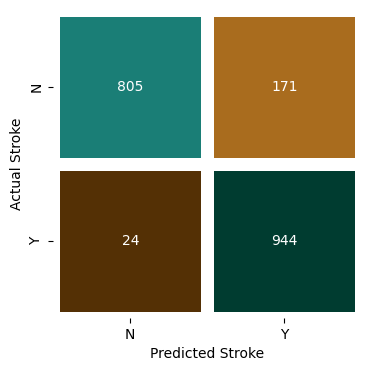

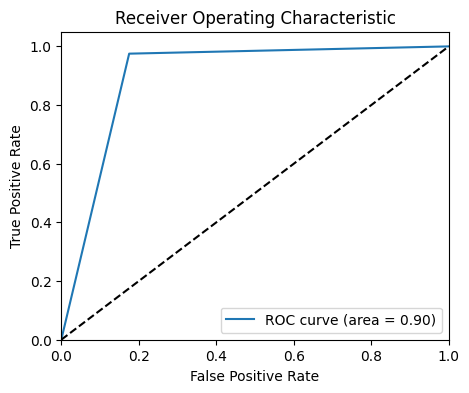

KNeighborsClassifier()

In [569]:
from sklearn.neighbors import KNeighborsClassifier
train_and_validate(KNeighborsClassifier(), X, y)

Accuracy of kNN classification model is much higher than Logistic regression model. So, we need to try hyperparameter tuning and PCA reduction on Logistic regression model.

#### 5.5 choosing best hyperparameter model for logistic regression model

In [570]:
# hyperparameter
from sklearn.model_selection import GridSearchCV
# create logistic regression object
logreg_model = LogisticRegression(solver='liblinear') # liblinear allows both l1 and l2 regularization
# specify hyperparameter grid
parameters = {'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
# perform grid search with 10-fold cross validation
grid_search = GridSearchCV(logreg_model, parameters, cv=10)
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'penalty': 'l1'}
Best score:  0.7938536590207541


#### 5.6 PCA on Logistic regression model

In [571]:
# PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = df_original.copy()
cols = ['age','gender','hypertension','heart_disease','ever_married','avg_glucose_level','bmi','work_type','Residence_type','smoking_status']
le = LabelEncoder()                       # initialise the necessary function taken from the LabelEncoder library
for col in cols:                          # iterate over all variables in cols
    df[col] = le.fit_transform(df[col])   # convert categorical values into integer values
X = df.drop(['stroke'],axis=1)
y = df['stroke']
print(X.head())
scaler = MinMaxScaler()       # Normalizing the feature variable
scaler.fit(X)
X = scaler.transform(X)

   gender  age  hypertension  heart_disease  ever_married  work_type  \
0       1   88             0              1             1          2   
1       0   82             0              0             1          3   
2       1  101             0              1             1          2   
3       0   70             0              0             1          2   
4       0  100             1              0             1          3   

   Residence_type  avg_glucose_level  bmi  smoking_status  
0               1               3849  240               1  
1               0               3587  162               2  
2               0               2483  199               2  
3               1               3384  218               3  
4               0               3393  113               2  


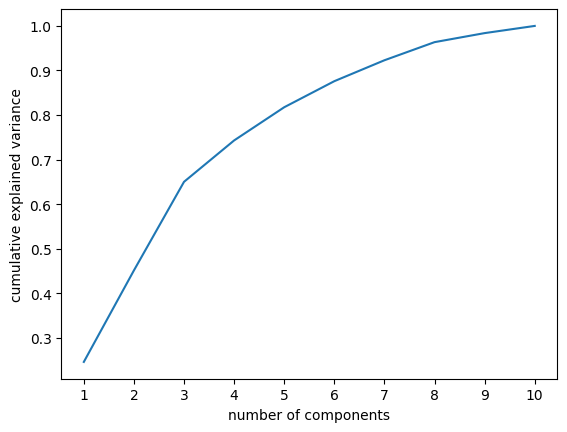

In [572]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(X)
plt.plot(range(1,11), np.cumsum(pca.explained_variance_ratio_)) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,11))  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


PCA reduces features from (5109, 10) to (5109, 10)

Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.796 with SD 0.019

Accuracy on training data is 0.797

Accuracy on test data is 0.745

Test data metrics: 
f1=0.273, 
precision=0.165, 
recall=0.790

[[712 248]
 [ 13  49]]


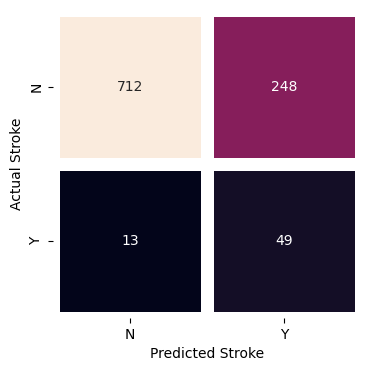

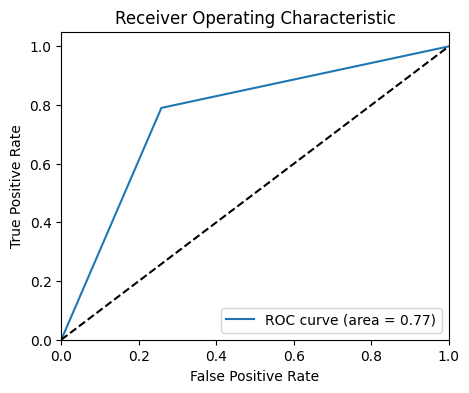

In [573]:

pca = PCA(n_components=10).fit(X)
X_reduc = pca.transform(X)
print('\nPCA reduces features from {} to {}'.format(X.shape, X_reduc.shape))
learnt_model = train_and_evaluate(LogisticRegression(), X_reduc, y)

After hyperparameter tuning and PCA feature reduction on Logistic regression model, kNN still outperforms the Logistic regression model